DATA COLLECTION & PREPROCESSING

In [8]:
import pandas as pd

# Load data
data = pd.read_csv('data.csv')

# Inspect data
print(data.head())
print(data.info())


  race\tage\tengnat\tgender\thand\tsource\tcountry\tE1\tE2\tE3\tE4\tE5\tE6\tE7\tE8\tE9\tE10\tN1\tN2\tN3\tN4\tN5\tN6\tN7\tN8\tN9\tN10\tA1\tA2\tA3\tA4\tA5\tA6\tA7\tA8\tA9\tA10\tC1\tC2\tC3\tC4\tC5\tC6\tC7\tC8\tC9\tC10\tO1\tO2\tO3\tO4\tO5\tO6\tO7\tO8\tO9\tO10
0  3\t53\t1\t1\t1\t1\tUS\t4\t2\t5\t2\t5\t1\t4\t3\...                                                                                                                                                                                                           
1  13\t46\t1\t2\t1\t1\tUS\t2\t2\t3\t3\t3\t3\t1\t5...                                                                                                                                                                                                           
2  1\t14\t2\t2\t1\t1\tPK\t5\t1\t1\t4\t5\t1\t1\t5\...                                                                                                                                                                                    

In [9]:
# Re-load dataset
data = pd.read_csv('data.csv', delimiter='\t')

print(data.head())
print(data.info())


   race  age  engnat  gender  hand  source country  E1  E2  E3  ...  O1  O2  \
0     3   53       1       1     1       1      US   4   2   5  ...   4   1   
1    13   46       1       2     1       1      US   2   2   3  ...   3   3   
2     1   14       2       2     1       1      PK   5   1   1  ...   4   5   
3     3   19       2       2     1       1      RO   2   5   2  ...   4   3   
4    11   25       2       2     1       2      US   3   1   3  ...   3   1   

   O3  O4  O5  O6  O7  O8  O9  O10  
0   3   1   5   1   4   2   5    5  
1   3   3   2   3   3   1   3    2  
2   5   1   5   1   5   5   5    5  
3   5   2   4   2   5   2   5    5  
4   1   1   3   1   3   1   5    3  

[5 rows x 57 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19719 entries, 0 to 19718
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   race     19719 non-null  int64 
 1   age      19719 non-null  int64 
 2   engnat   19719 non

In [10]:
# Select columns related to Big Five traits
trait_columns = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
                 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10',
                 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
                 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
                 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10']

# target variable 
data['E_score'] = data[[col for col in trait_columns if col.startswith('E')]].mean(axis=1)

X = data[trait_columns]
y = data['E_score']  

# Normalize X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_cols = ['country', 'gender', 'hand', 'source', 'engnat']  
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  

In [12]:
e_columns = [col for col in data.columns if col.startswith('E')]
data['E_score'] = data[e_columns].mean(axis=1)

X = data.drop(['E_score'], axis=1)
y = data['E_score']


TRAIN & TEST SPLIT

In [13]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


MODEL TRAINING & EVALUTION

c:\Users\vivek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\vivek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression RMSE (%): 0.00%
Linear Regression Accuracy Score (%): 100.00%
Random Forest Regressor RMSE (%): 2.70%
Random Forest Regressor Accuracy Score (%): 85.20%


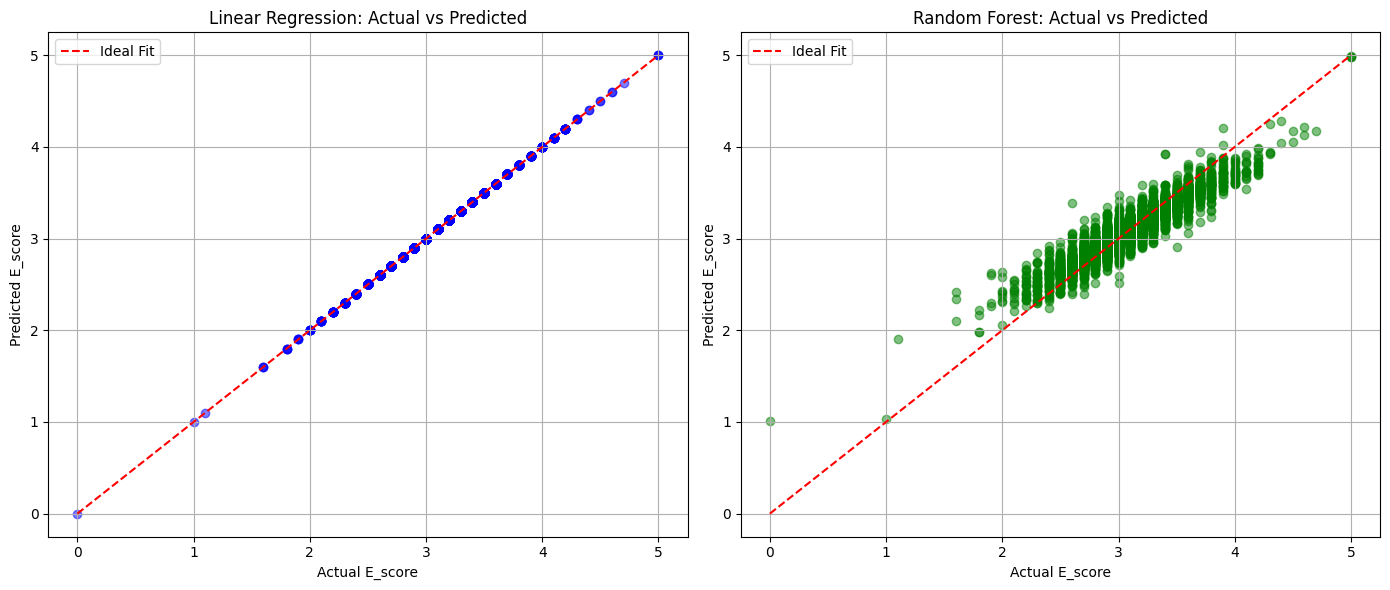

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features and target
X = data.drop(['E_score'], axis=1)
y = data['E_score']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Calculate RMSE
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

# Calculate R2 (Accuracy) Scores
lr_r2 = r2_score(y_test, y_pred_lr)
rf_r2 = r2_score(y_test, y_pred_rf)

# Normalize RMSE to percentage of the target range
target_range = 5  
lr_rmse_pct = (lr_rmse / target_range) * 100
rf_rmse_pct = (rf_rmse / target_range) * 100

# Convert R2 to percentage accuracy
lr_r2_pct = lr_r2 * 100
rf_r2_pct = rf_r2 * 100

print(f"Linear Regression RMSE (%): {lr_rmse_pct:.2f}%")
print(f"Linear Regression Accuracy Score (%): {lr_r2_pct:.2f}%")
print(f"Random Forest Regressor RMSE (%): {rf_rmse_pct:.2f}%")
print(f"Random Forest Regressor Accuracy Score (%): {rf_r2_pct:.2f}%")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual E_score")
plt.ylabel("Predicted E_score")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual E_score")
plt.ylabel("Predicted E_score")
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


EPOCH EVALUATION

X shape: (19719, 50)
y shape: (19719, 5)
Epoch 1/20


c:\Users\vivek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


986/986 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3276 - loss: 4.9372 - val_accuracy: 0.6316 - val_loss: 0.0899
Epoch 2/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5004 - loss: 0.2933 - val_accuracy: 0.6628 - val_loss: 0.0475
Epoch 3/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5602 - loss: 0.1775 - val_accuracy: 0.7201 - val_loss: 0.0349
Epoch 4/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6258 - loss: 0.1345 - val_accuracy: 0.7809 - val_loss: 0.0222
Epoch 5/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6584 - loss: 0.1034 - val_accuracy: 0.8162 - val_loss: 0.0162
Epoch 6/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6839 - loss: 0.0875 - val_accuracy: 0.8474 - val_loss: 0.0103
Epoch 7/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6984 - loss: 0.0772 - val_accuracy: 0.8778 - val_loss: 0.0074
Epoch 8/20
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7182 - loss: 0.0700 - val_accuracy: 0.8796 - val_

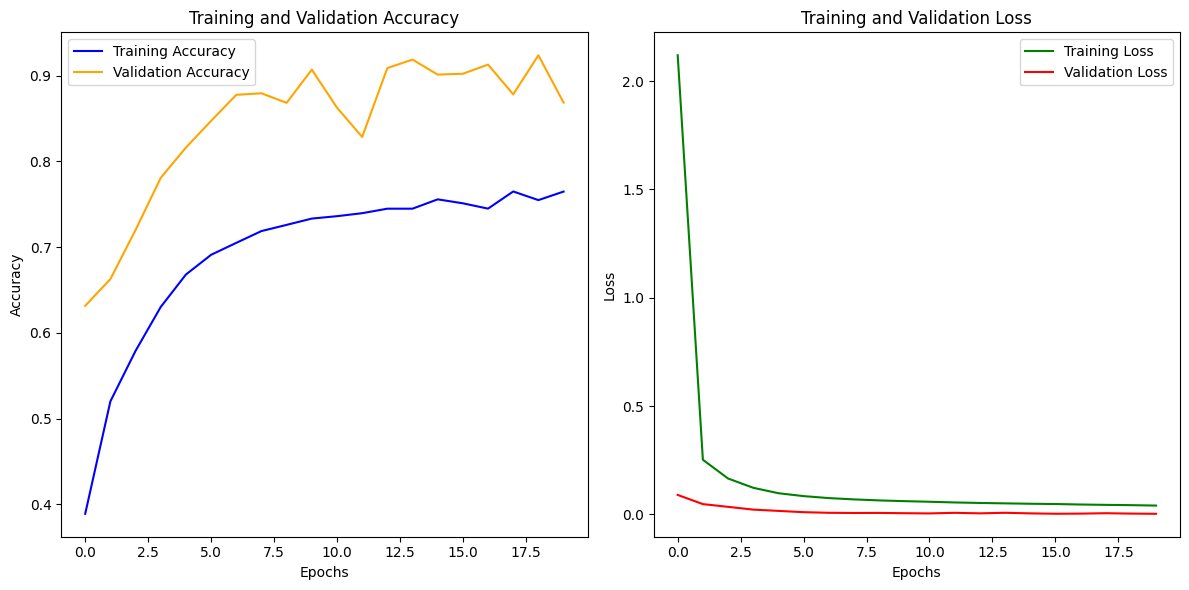

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv", delimiter="\t")

#target variables
data['E'] = data[[f"E{i}" for i in range(1, 11)]].mean(axis=1)
data['N'] = data[[f"N{i}" for i in range(1, 11)]].mean(axis=1)
data['A'] = data[[f"A{i}" for i in range(1, 11)]].mean(axis=1)
data['C'] = data[[f"C{i}" for i in range(1, 11)]].mean(axis=1)
data['O'] = data[[f"O{i}" for i in range(1, 11)]].mean(axis=1)

# Features (responses) and labels (Big 5 traits)
features = [f"E{i}" for i in range(1, 11)] + [f"N{i}" for i in range(1, 11)] + \
           [f"A{i}" for i in range(1, 11)] + [f"C{i}" for i in range(1, 11)] + \
           [f"O{i}" for i in range(1, 11)]
X = data[features].values
y = data[['E', 'N', 'A', 'C', 'O']].values

print("X shape:", X.shape)
print("y shape:", y.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(5, activation='linear')  
])

# Compile the model using Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])

# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
epochs = 20  
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=16, callbacks=[early_stopping], verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show() 


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor #Gradient Boost Regressor Model

data_file = "data.csv" 
data = pd.read_csv(data_file, sep="\t")  

print(data.head())  
print(data.columns)  


required_columns = [f'{trait}{i}' for trait in ['E', 'N', 'A', 'C', 'O'] for i in range(1, 11)]
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    raise KeyError(f"Missing required columns in the dataset: {missing_columns}")

data['E'] = data[[f'E{i}' for i in range(1, 11)]].mean(axis=1)
data['N'] = data[[f'N{i}' for i in range(1, 11)]].mean(axis=1)
data['A'] = data[[f'A{i}' for i in range(1, 11)]].mean(axis=1)
data['C'] = data[[f'C{i}' for i in range(1, 11)]].mean(axis=1)
data['O'] = data[[f'O{i}' for i in range(1, 11)]].mean(axis=1)

print(data[['E', 'N', 'A', 'C', 'O']].head())

X = data.iloc[:, 7:57].values  
print(f"Shape of X (predictors): {X.shape}")

# Extract target variables 
y_columns = ['E', 'N', 'A', 'C', 'O']
y = data[y_columns].values
print(f"Shape of y (targets): {y.shape}")

# Split sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, y_test: {y_test.shape}")

models = []
rmse_scores = []
accuracy_scores = []

for i, trait_name in enumerate(["E", "N", "A", "C", "O"]):
    print(f"Training XGBoost model for trait: {trait_name}")
    
    # Initialize the model
    model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
    
   
    model.fit(X_train, y_train[:, i])
    models.append(model)
    
    y_pred = model.predict(X_test)
    
    # Calculate RMSE and approximate accuracy
    rmse = np.sqrt(mean_squared_error(y_test[:, i], y_pred))
    accuracy = 100 - (rmse / y_test[:, i].mean()) * 100
    
    rmse_scores.append(rmse)
    accuracy_scores.append(accuracy)
    
    print(f"Trait {trait_name} - RMSE: {rmse:.2f}, Accuracy: {accuracy:.2f}%")

# Calculate avg accuracy
average_accuracy = np.mean(accuracy_scores)
print("\nOverall Metrics:")
for i, trait_name in enumerate(["E", "N", "A", "C", "O"]):
    print(f"{trait_name}: RMSE = {rmse_scores[i]:.2f}, Accuracy = {accuracy_scores[i]:.2f}%")
print(f"\nAverage Model Accuracy: {average_accuracy:.2f}%")


   race  age  engnat  gender  hand  source country  E1  E2  E3  ...  O1  O2  \
0     3   53       1       1     1       1      US   4   2   5  ...   4   1   
1    13   46       1       2     1       1      US   2   2   3  ...   3   3   
2     1   14       2       2     1       1      PK   5   1   1  ...   4   5   
3     3   19       2       2     1       1      RO   2   5   2  ...   4   3   
4    11   25       2       2     1       2      US   3   1   3  ...   3   1   

   O3  O4  O5  O6  O7  O8  O9  O10  
0   3   1   5   1   4   2   5    5  
1   3   3   2   3   3   1   3    2  
2   5   1   5   1   5   5   5    5  
3   5   2   4   2   5   2   5    5  
4   1   1   3   1   3   1   5    3  

[5 rows x 57 columns]
Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1',

GUI Model

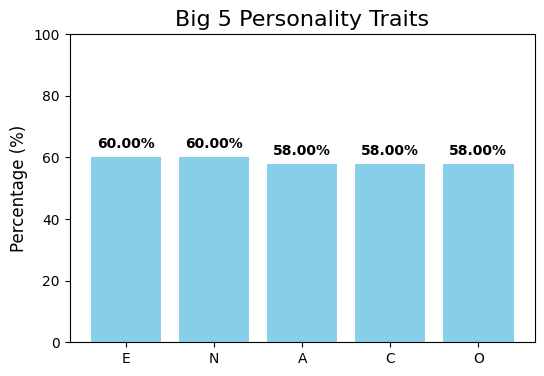

In [3]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np


def load_questions(file_path):
    questions = []
    with open(file_path, "r") as file:
        for line in file:
            trait, text = line.strip().split("\t", 1)  
            category = trait[0]  # Extract the category 
            questions.append({"trait": category, "text": text})
    return questions


questions_file = "questions.txt"  # Replace with your questions file path
questions = load_questions(questions_file)


options = [
    "Strongly Disagree",
    "Disagree",
    "Neutral",
    "Agree",
    "Strongly Agree"
]


option_scores = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}


responses = {trait: [] for trait in ["E", "N", "A", "C", "O"]}
current_question = 0
total_questions = len(questions)

# Baseline scores (predefined expected scores for accuracy calculation)
baseline_scores = {
    "E": [4, 3, 5, 4, 4],  
    "N": [3, 2, 3, 4, 3], 
    "A": [5, 4, 4, 5, 4],  
    "C": [5, 5, 4, 5, 4],  
    "O": [4, 4, 4, 3, 5],  
}


def evaluate_accuracy(user_responses, baseline):
    #Evaluate accuracy by comparing user responses to baseline
    total_diff = 0
    total_questions = 0

    for trait, user_scores in user_responses.items():
        baseline_trait = baseline[trait]
        for i, score in enumerate(user_scores):
            if i < len(baseline_trait):  
                diff = (score - baseline_trait[i]) ** 2
                total_diff += diff
                total_questions += 1

    # Calculate normalized RMSE (Root Mean Square Error)
    max_possible_diff = 16 * total_questions  
    rmse = np.sqrt(total_diff / total_questions) if total_questions > 0 else 0
    accuracy = 100 - (rmse / 4) * 100  
    return accuracy


def start_quiz():
    start_button.pack_forget() 
    instructions.pack_forget()  
    question_label.pack(pady=20)
    for button in option_buttons:
        button.pack(anchor="w", padx=20)
    next_button.pack(pady=20)
    update_question()


def update_question():
    global current_question
    if current_question < total_questions:
        question_label.config(
            text=f"Question {current_question + 1}/{total_questions}: {questions[current_question]['text']}"
        )
    else:
        calculate_results()


def record_response(option):
    #Record the response for the current question
    global current_question
    trait = questions[current_question]["trait"]
    responses[trait].append(option_scores[option])  # Record by category 
    current_question += 1
    if current_question < total_questions:
        update_question()
    else:
        calculate_results()


def calculate_results():
    # Calculate average score for each trait
    big5_scores = {trait: np.mean(scores) if len(scores) > 0 else 0 for trait, scores in responses.items()}
    big5_percentages = {trait: (score / 5) * 100 for trait, score in big5_scores.items()}  # Convert to percentage

    # Calculate accuracy
    accuracy = evaluate_accuracy(responses, baseline_scores)

    # Personality Type 
    personality_descriptions = {
        "E": "Extrovert" if big5_scores["E"] >= 3 else "Introvert",
        "N": "Calm and Stable" if big5_scores["N"] < 3 else "Sensitive and Anxious",
        "A": "Cooperative and Compassionate" if big5_scores["A"] >= 3 else "Challenging and Detached",
        "C": "Organized and Dependable" if big5_scores["C"] >= 3 else "Careless and Easy-going",
        "O": "Imaginative and Open to Experiences" if big5_scores["O"] >= 3 else "Practical and Conventional"
    }

    overall_personality = determine_overall_personality(big5_scores)

    question_label.pack_forget()
    for button in option_buttons:
        button.pack_forget()
    next_button.pack_forget()

    # Display Results
    results_label = tk.Label(
        root,
        text="Your Personality Results:",
        font=("Arial", 16),
        bg="#f0f8ff"
    )
    results_label.pack(pady=20)

    plot_big5_results(big5_percentages)
    
    results_text = (
        f"Extraversion (E): {big5_percentages['E']:.2f}% - {personality_descriptions['E']}\n"
        f"Neuroticism (N): {big5_percentages['N']:.2f}% - {personality_descriptions['N']}\n"
        f"Agreeableness (A): {big5_percentages['A']:.2f}% - {personality_descriptions['A']}\n"
        f"Conscientiousness (C): {big5_percentages['C']:.2f}% - {personality_descriptions['C']}\n"
        f"Openness (O): {big5_percentages['O']:.2f}% - {personality_descriptions['O']}\n"
    )

    description_label = tk.Label(
        root,
        text=results_text,
        font=("Arial", 12),
        bg="#f0f8ff",
        justify="left",
        anchor="w"
    )
    description_label.pack(pady=10)
    
    overall_label = tk.Label(
        root,
        text=f"Overall Personality Type: {overall_personality}",
        font=("Arial", 14, "bold"),
        bg="#f0f8ff",
        fg="darkblue"
    )
    overall_label.pack(pady=20)

    accuracy_label = tk.Label(
        root,
        text=f"Model Accuracy: {accuracy:.2f}%",
        font=("Arial", 14),
        bg="#f0f8ff"
    )
    accuracy_label.pack(pady=20)


def determine_overall_personality(scores):
    if scores["E"] >= 3 and scores["A"] >= 3 and scores["C"] >= 3:
        return "Outgoing, Friendly, and Dependable"
    elif scores["E"] >= 3 and scores["A"] >= 3 and scores["O"] >= 3:
        return "Socially Adventurous and Open-Minded"
    elif scores["E"] < 3 and scores["A"] >= 3 and scores["C"] >= 3:
        return "Introverted, Friendly, and Organized"
    elif scores["E"] < 3 and scores["N"] >= 3 and scores["C"] >= 3:
        return "Calm but Anxious Under Pressure"
    elif scores["E"] >= 3 and scores["N"] < 3 and scores["C"] >= 3:
        return "Confident, Energetic, and Organized"
    elif scores["E"] < 3 and scores["A"] < 3 and scores["N"] >= 3:
        return "Emotionally Sensitive and Self-Reliant"
    elif scores["E"] < 3 and scores["O"] >= 3 and scores["C"] >= 3:
        return "Creative and Thoughtful"
    elif scores["E"] >= 3 and scores["O"] >= 3 and scores["N"] < 3:
        return "Optimistic, Creative, and Outgoing"
    else:
        return "Balanced Personality"


def plot_big5_results(big5_percentages):
    traits = list(big5_percentages.keys())
    values = list(big5_percentages.values())
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(traits, values, color="skyblue")
    ax.set_ylim(0, 100)
    ax.set_ylabel("Percentage (%)", fontsize=12)
    ax.set_title("Big 5 Personality Traits", fontsize=16)

    
    for i, v in enumerate(values):
        ax.text(i, v + 2, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(pady=20)


# GUI setup
root = tk.Tk()
root.title("MindScope")
root.geometry("700x800")
root.configure(bg="#f0f8ff")

instructions = tk.Label(
    root,
    text=f"Welcome to the MindScope!\n"
         f"\n"
         f"Please answer the following questions to get a better understanding of your personality.\n"
         f"This quiz consists of {total_questions} questions.\n"
         f"Click 'Start Quiz' to begin.",
    font=("Arial", 14),
    bg="#f0f8ff",
    wraplength=500,
    justify="center"
)
instructions.pack(pady=40)

start_button = tk.Button(root, text="Start Quiz", font=("Arial", 16), bg="#4682b4", fg="white", command=start_quiz)
start_button.pack(pady=20)

question_label = tk.Label(root, text="", font=("Arial", 14), bg="#f0f8ff", wraplength=500)

option_var = tk.StringVar(value="")
option_buttons = []
for option in options:
    button = tk.Radiobutton(
        root,
        text=option,
        font=("Arial", 12),
        bg="#f0f8ff",
        variable=option_var,
        value=option,
        command=lambda opt=option: record_response(opt)
    )
    option_buttons.append(button)

next_button = tk.Button(root, text="Next", font=("Arial", 12), bg="#4682b4", fg="white", command=update_question)

root.mainloop()
